In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
import probml_utils.pgmpy_utils as pgm
from causalgraphicalmodels import CausalGraphicalModel
# Note: If you are using python 3.3 or greater, you will need to update collections to collections.abc

import numpy as np
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import PC, HillClimbSearch, TreeSearch, BIC, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.metrics import structure_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data Preprocessing

In [4]:
insurance_claim=pd.read_csv('insurance_claims.csv')
insurance_claim.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
insurance_claim.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
insurance_claim.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
insurance_claim=insurance_claim.replace("?",np.nan)

In [8]:
round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                  17.8
incident_severity                0.0
authorities_contacted            9.1
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [9]:
### Checking unique values for collosion type

round(100*(insurance_claim['collision_type'].value_counts(normalize=True,dropna=False)),2)

collision_type
Rear Collision     29.2
Side Collision     27.6
Front Collision    25.4
NaN                17.8
Name: proportion, dtype: float64

In [10]:
### We can impute collosion type with mode i.e most occuring collosion type
### imputing

insurance_claim['collision_type']=insurance_claim['collision_type'].fillna(insurance_claim['collision_type'].mode()[0])

In [11]:
### Checking unique values for collosion type

round(100*(insurance_claim['property_damage'].value_counts(normalize=True,dropna=False)),2)

property_damage
NaN    36.0
NO     33.8
YES    30.2
Name: proportion, dtype: float64

In [12]:
### If there was property loss,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['property_damage']=insurance_claim['property_damage'].fillna("NO")

In [13]:
### Checking unique values for collosion type

round(100*(insurance_claim['police_report_available'].value_counts(normalize=True,dropna=False)),2)

police_report_available
NaN    34.3
NO     34.3
YES    31.4
Name: proportion, dtype: float64

In [14]:
### If there was police reported,then the report would have been filed.So,we can consider missing value as "NO"
###Imputing with "NO"

insurance_claim['police_report_available']=insurance_claim['property_damage'].fillna("NO")

In [15]:
### Checking missing value again

round(100*(insurance_claim.isnull().sum()/len(insurance_claim.index)),2)

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                   0.0
incident_severity                0.0
authorities_contacted            9.1
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

In [16]:
### Dropping those column which are not much sighnificance in oir analysis

insurance_claim.drop(["incident_hour_of_the_day",'insured_zip','policy_bind_date','incident_location'],axis=1,inplace=True)

In [17]:
### Checking values for each column

insurance_claim.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available           2
total_claim_amount          

In [18]:
### Total claim must be equal to sum of "injury_claim","property_claim","vehicle_claim"

insurance_claim[insurance_claim['total_claim_amount'] != insurance_claim['injury_claim']+insurance_claim['property_claim']+insurance_claim['vehicle_claim']].shape[0]

0

In [19]:
### Others sanity check

print(insurance_claim[insurance_claim['months_as_customer']<0].shape[0])
print(insurance_claim[insurance_claim['age']<0].shape[0])
print(insurance_claim[insurance_claim['policy_annual_premium']<0].shape[0])
print(insurance_claim[insurance_claim['total_claim_amount']<0].shape[0])
print(insurance_claim[insurance_claim['umbrella_limit']<0].shape[0])
print(insurance_claim[insurance_claim['capital-gains']<0].shape[0])
print(insurance_claim[insurance_claim['number_of_vehicles_involved']<0].shape[0])
print(insurance_claim[insurance_claim['injury_claim']<0].shape[0])
print(insurance_claim[insurance_claim['property_claim']<0].shape[0])
print(insurance_claim[insurance_claim['vehicle_claim']<0].shape[0])

0
0
0
0
1
0
0
0
0
0


In [20]:
### Fetching that row

insurance_claim[insurance_claim['umbrella_limit']<0]

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
290,284,42,526039,OH,100/300,500,1338.54,-1000000,MALE,Associate,...,YES,94160,8560,17120,68480,Chevrolet,Malibu,1996,N,NaN


In [21]:
### dropping above row

insurance_claim.drop(insurance_claim.index[290],inplace=True)

In [22]:
### changing Incident date into datetime format
insurance_claim['incident_date']=pd.to_datetime(insurance_claim['incident_date'],format='%Y-%m-%d')

### changing auto_year date into datetime format
insurance_claim['auto_year']=pd.to_datetime(insurance_claim['auto_year'],format='%Y')

In [23]:
### Checking datatypes again
insurance_claim.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

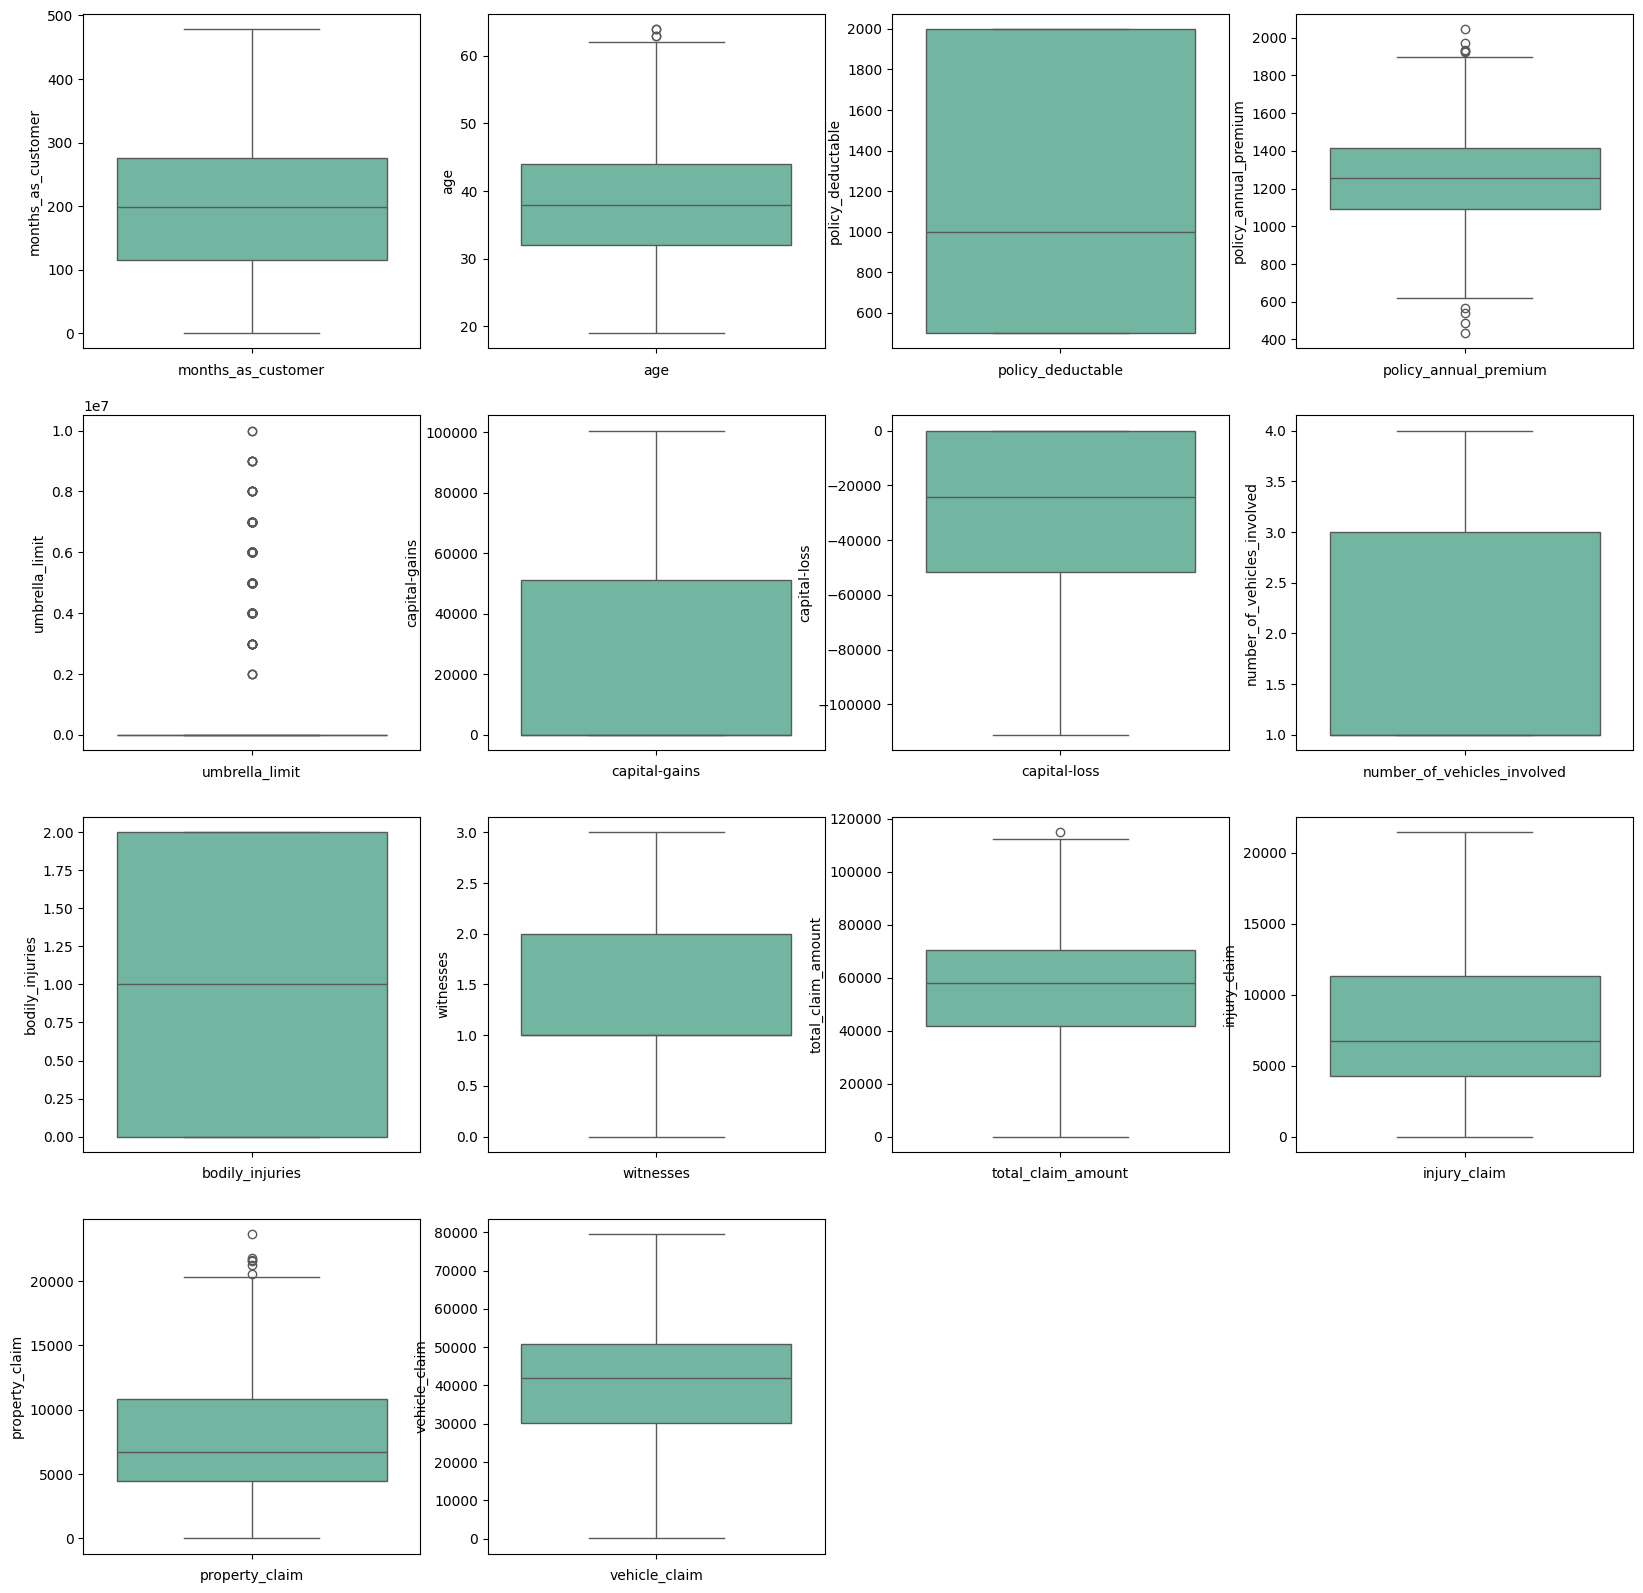

In [24]:
#outlier
plt.figure(figsize=[20,20])


num_col= ['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']

c=1

for i in num_col:
    plt.subplot(4, 4, c)
    plt.xlabel(i)
    sns.boxplot(insurance_claim[i] , palette="Set2")
    c = c + 1

plt.show()

In [25]:
insurance_claim['count']=1

In [26]:
insurance_claim.drop(columns=['_c39'],inplace=True)

# 2. EDA

📋 General Information

* **Rows:** 999
* **Columns:** 35


🔢 Numerical Features

| Column                        | Description                                                      |
| ----------------------------- | ---------------------------------------------------------------- |
| `months_as_customer`          | Duration (in months) that the customer has been with the insurer |
| `age`                         | Age of the insured individual                                    |
| `policy_number`               | Unique identifier of the insurance policy                        |
| `policy_deductable`           | Deductible amount of the policy                                  |
| `policy_annual_premium`       | Annual premium paid for the policy                               |
| `umbrella_limit`              | Umbrella coverage limit (can be 0 or large values like \$5M)     |
| `capital-gains`               | Capital gains declared by the customer                           |
| `capital-loss`                | Capital losses declared by the customer                          |
| `number_of_vehicles_involved` | Number of vehicles in the incident                               |
| `bodily_injuries`             | Number of bodily injuries reported                               |
| `witnesses`                   | Number of witnesses                                              |
| `total_claim_amount`          | Total monetary value claimed                                     |
| `injury_claim`                | Amount claimed for injuries                                      |
| `property_claim`              | Amount claimed for property damage                               |
| `vehicle_claim`               | Amount claimed for vehicle damage                                |
| `auto_year`                   | Year the vehicle was made                                        |


🆔 Identifiers & Dates

| Column             | Description               |
| ------------------ | ------------------------- |
| `incident_date`    | Date of the incident      |


🔤 Categorical Features

| Column                    | Description                                                            |
| ------------------------- | ---------------------------------------------------------------------- |
| `policy_state`            | State where the policy was issued (OH, IL, IN)                         |
| `policy_csl`              | Combined single limit (e.g., 250/500)                                  |
| `insured_sex`             | Gender of the insured                                                  |
| `insured_education_level` | Education level                                                        |
| `insured_occupation`      | Job title or sector                                                    |
| `insured_hobbies`         | Hobby of the insured                                                   |
| `insured_relationship`    | Relationship status (e.g., husband, wife, own-child)                   |
| `incident_type`           | Type of incident (Single Vehicle Collision, Multi-vehicle, Parked Car) |
| `collision_type`          | Type of collision (Side, Rear, Front)                                  |
| `incident_severity`       | Severity of the incident                                               |
| `authorities_contacted`   | Whether authorities were contacted (Police, Fire, etc.)                |
| `incident_state`          | State where the incident occurred                                      |
| `incident_city`           | City of the incident                                                   |
| `property_damage`         | Whether there was property damage (YES, NO, ?)                         |
| `police_report_available` | Availability of police report (YES, NO, ?)                             |
| `auto_make`               | Car brand (e.g., Dodge, Mercedes, Chevrolet)                           |
| `auto_model`              | Model of the car (e.g., RAM, E400, Tahoe)                              |
| `fraud_reported`          | Target: Whether fraud was reported (Y/N)                               |


### 2.1 Fraud reported

In [ ]:
fig = px.pie(insurance_claim,names='fraud_reported')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [26]:
### Datasplitting into fraud and not fraud category

insurance_claim_f=insurance_claim[insurance_claim['fraud_reported']=='Y']
insurance_claim_nf=insurance_claim[insurance_claim['fraud_reported']=='N']

### 2.2 Distribution of Total Claim Amount by Policy State and Fraud Status

In [36]:
fig = px.box(insurance_claim, x="policy_state", y="total_claim_amount", color="fraud_reported")
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

### 2.3 Relationship Between Policy Annual Premium and Total Claim Amount by Fraud Status

In [40]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='total_claim_amount',color='fraud_reported',marginal_x='histogram',marginal_y='histogram',trendline='ols')
fig.update_layout(
    width=1000,     # customize width
    height=500     # customize height
)
fig.show()

### 2.4 Relationship Between Policy Premium and Different Types of Claims by Fraud Status

In [41]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='property_claim',color='fraud_reported')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [42]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='vehicle_claim',color='fraud_reported')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [43]:
fig=px.scatter(insurance_claim,x='policy_annual_premium',y='injury_claim',color='fraud_reported')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

### 2.5 Age vs. Total Claim Amount with Fraud Status and Distribution Marginals

In [44]:
fig=px.scatter(insurance_claim,x='age',y='total_claim_amount',color='fraud_reported',marginal_x='box',marginal_y='violin',trendline='ols')
fig.update_layout(
    width=1000,     # customize width
    height=500     # customize height
)
fig.show()

### 2.6 Distribution of Key Categorical Variables by Fraud Status

In [34]:
groupdf_is=insurance_claim.groupby(by=['insured_sex','fraud_reported']).count()
groupdf_is.reset_index(inplace=True)
groupdf_is=groupdf_is[['insured_sex','fraud_reported','count']]
groupdf_is.head()

,insured_sex,fraud_reported,count
0,FEMALE,N,411
1,FEMALE,Y,126
2,MALE,N,341
3,MALE,Y,121


In [45]:
fig=px.bar(groupdf_is,x='insured_sex',y='count',color='fraud_reported',text='count',pattern_shape_sequence=['|','/'],pattern_shape='fraud_reported')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [47]:
groupdf_uu=insurance_claim.groupby(by=['umbrella_limit','fraud_reported']).count()
groupdf_uu.reset_index(inplace=True)
groupdf_uu=groupdf_uu[['umbrella_limit','fraud_reported','count']]
groupdf_uu.head(3)

,umbrella_limit,fraud_reported,count
0,0,N,611
1,0,Y,187
2,2000000,N,1


In [48]:
fig=px.bar(groupdf_uu,x='umbrella_limit',y='count',color='fraud_reported',text='count')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [49]:
groupdf_el=insurance_claim.groupby(by=['insured_education_level','fraud_reported']).count()
groupdf_el.reset_index(inplace=True)
groupdf_el=groupdf_el[['insured_education_level','fraud_reported','count']]
groupdf_el.head()

,insured_education_level,fraud_reported,count
0,Associate,N,110
1,Associate,Y,34
2,College,N,90
3,College,Y,32
4,High School,N,124


In [51]:
fig=px.bar(groupdf_el,x='insured_education_level',y='count',color='fraud_reported',text='count',title="Insurance Claim for different education Level")
fig.update_layout(
    width=1200,     # customize width
    height=500     # customize height
)
fig.show()

In [52]:
groupdf_ic=insurance_claim.groupby(by=['insured_occupation','fraud_reported']).count()
groupdf_ic.reset_index(inplace=True)
groupdf_ic=groupdf_ic[['insured_occupation','fraud_reported','count']]
groupdf_ic.head()

,insured_occupation,fraud_reported,count
0,adm-clerical,N,54
1,adm-clerical,Y,11
2,armed-forces,N,52
3,armed-forces,Y,17
4,craft-repair,N,52


In [54]:
fig=px.bar(groupdf_ic,x='insured_occupation',y='count',color='fraud_reported',text='count',title='Number of Claims diffrent Occupation')
fig.update_layout(
    width=1200,     # customize width
    height=500     # customize height
)
fig.show()

In [55]:
groupdf_h=insurance_claim.groupby(by=['insured_hobbies','fraud_reported']).count()
groupdf_h.reset_index(inplace=True)
groupdf_h=groupdf_h[['insured_hobbies','fraud_reported','count']]
groupdf_h.head()

,insured_hobbies,fraud_reported,count
0,base-jumping,N,36
1,base-jumping,Y,13
2,basketball,N,28
3,basketball,Y,6
4,board-games,N,34


In [56]:
fig=px.bar(groupdf_h,x='insured_hobbies',y='count',color='fraud_reported',text='count',title="Hobby Wise claim")
fig.update_layout(
    width=1200,     # customize width
    height=500     # customize height
)
fig.show()

In [57]:
groupdf_rl=insurance_claim.groupby(by=['insured_relationship','fraud_reported']).count()
groupdf_rl.reset_index(inplace=True)
groupdf_rl=groupdf_rl[['insured_relationship','fraud_reported','count']]
groupdf_rl.head()

,insured_relationship,fraud_reported,count
0,husband,N,135
1,husband,Y,35
2,not-in-family,N,129
3,not-in-family,Y,45
4,other-relative,N,125


In [58]:
fig=px.bar(groupdf_rl,x='insured_relationship',y='count',color='fraud_reported',text='count')
fig.update_layout(
    width=1200,     # customize width
    height=500     # customize height
)
fig.show()

In [59]:
groupdf_it=insurance_claim.groupby(by=['incident_type','fraud_reported']).count()
groupdf_it.reset_index(inplace=True)
groupdf_it=groupdf_it[['incident_type','fraud_reported','count']]
groupdf_it.head()

,incident_type,fraud_reported,count
0,Multi-vehicle Collision,N,305
1,Multi-vehicle Collision,Y,114
2,Parked Car,N,76
3,Parked Car,Y,8
4,Single Vehicle Collision,N,285


In [61]:
fig=px.bar(groupdf_it,x='incident_type',y='count',color='fraud_reported',text='count',title="Number of claims Vs. Incident type")
fig.update_layout(
    width=1200,     # customize width
    height=500     # customize height
)
fig.show()

In [62]:
groupdf_ct=insurance_claim.groupby(by=['collision_type','fraud_reported']).count()
groupdf_ct.reset_index(inplace=True)
groupdf_ct=groupdf_ct[['collision_type','fraud_reported','count']]
groupdf_ct.head()

,collision_type,fraud_reported,count
0,Front Collision,N,184
1,Front Collision,Y,70
2,Rear Collision,N,363
3,Rear Collision,Y,107
4,Side Collision,N,205


In [64]:
fig=px.bar(groupdf_ct,x='collision_type',y='count',color='fraud_reported',text='count',title="Nos. of Claim for different type of collision")
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [65]:
groupdf_ins=insurance_claim.groupby(by=['incident_severity','fraud_reported']).count()
groupdf_ins.reset_index(inplace=True)
groupdf_ins=groupdf_ins[['incident_severity','fraud_reported','count']]
groupdf_ins.head()

,incident_severity,fraud_reported,count
0,Major Damage,N,108
1,Major Damage,Y,167
2,Minor Damage,N,316
3,Minor Damage,Y,38
4,Total Loss,N,244


In [66]:
fig=px.bar(groupdf_ins,x='incident_severity',y='count',color='fraud_reported',text='count',title="Number of claim Vs. Incident severity")
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [68]:
groupdf_ac=insurance_claim.groupby(by=['authorities_contacted','fraud_reported']).count()
groupdf_ac.reset_index(inplace=True)
groupdf_ac=groupdf_ac[['authorities_contacted','fraud_reported','count']]
groupdf_ac.head()

,authorities_contacted,fraud_reported,count
0,Ambulance,N,138
1,Ambulance,Y,57
2,Fire,N,163
3,Fire,Y,60
4,Other,N,135


In [69]:
fig=px.bar(groupdf_ac,x='authorities_contacted',y='count',color='fraud_reported',text='count')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [70]:
groupdf_st=insurance_claim.groupby(by=['incident_state','fraud_reported']).count()
groupdf_st.reset_index(inplace=True)
groupdf_st=groupdf_st[['incident_state','fraud_reported','count']]
groupdf_st.head()

,incident_state,fraud_reported,count
0,NC,N,75
1,NC,Y,34
2,NY,N,204
3,NY,Y,58
4,OH,N,13


In [71]:
fig=px.bar(groupdf_st,x='incident_state',y='count',color='fraud_reported',text='count',title="Claims for different state")
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [72]:
groupdf_pd=insurance_claim.groupby(by=['property_damage','fraud_reported']).count()
groupdf_pd.reset_index(inplace=True)
groupdf_pd=groupdf_pd[['property_damage','fraud_reported','count']]
groupdf_pd.head()

,property_damage,fraud_reported,count
0,NO,N,529
1,NO,Y,169
2,YES,N,223
3,YES,Y,78


In [73]:
fig=px.bar(groupdf_pd,x='property_damage',y='count',color='fraud_reported',text='count')
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()

In [74]:
groupdf_w=insurance_claim.groupby(by=['witnesses','fraud_reported']).count()
groupdf_w.reset_index(inplace=True)
groupdf_w=groupdf_w[['witnesses','fraud_reported','count']]
groupdf_w.head()

,witnesses,fraud_reported,count
0,0,N,199
1,0,Y,50
2,1,N,194
3,1,Y,63
4,2,N,176


In [75]:
fig=px.bar(groupdf_w,x='witnesses',y='count',color='fraud_reported',text='count',title="Nos. of claims vs No. of witnesses")
fig.update_layout(
    width=900,     # customize width
    height=500     # customize height
)
fig.show()


In [76]:
groupdf_am=insurance_claim.groupby(by=['auto_make','fraud_reported']).count()
groupdf_am.reset_index(inplace=True)
groupdf_am=groupdf_am[['auto_make','fraud_reported','count']]
groupdf_am.head()

,auto_make,fraud_reported,count
0,Accura,N,55
1,Accura,Y,13
2,Audi,N,48
3,Audi,Y,21
4,BMW,N,52


In [78]:
fig=px.bar(groupdf_am,x='auto_make',y='count',color='fraud_reported',text='count',title="Claims for different auto make")
fig.update_layout(
    width=1200,     # customize width
    height=500     # customize height
)
fig.show()

In [79]:
groupdf_atm=insurance_claim.groupby(by=['auto_model','fraud_reported']).count()
groupdf_atm.reset_index(inplace=True)
groupdf_atm=groupdf_atm[['auto_model','fraud_reported','count']]
groupdf_atm.head()

,auto_model,fraud_reported,count
0,3 Series,N,17
1,3 Series,Y,1
2,92x,N,20
3,92x,Y,8
4,93,N,20


In [82]:
fig=px.bar(groupdf_atm,x='auto_model',y='count',color='fraud_reported',text='count',title="Claims for diiferent auto model")
fig.update_layout(
    width=1400,     # customize width
    height=600     # customize height
)
fig.show()


In [83]:
groupdf_atmm=insurance_claim.groupby(by=['auto_make','auto_model','fraud_reported']).count()
groupdf_atmm.reset_index(inplace=True)
groupdf_atmm=groupdf_atmm[['auto_make','auto_model','fraud_reported','count']]
groupdf_atmm['fraud_reported']=groupdf_atmm['fraud_reported'].apply(lambda x: 'Fraud Reported :YES' if x == 'Y' else 'Fraud Reported :NO')
groupdf_atmm.head()

,auto_make,auto_model,fraud_reported,count
0,Accura,MDX,Fraud Reported :NO,28
1,Accura,MDX,Fraud Reported :YES,8
2,Accura,RSX,Fraud Reported :NO,11
3,Accura,RSX,Fraud Reported :YES,1
4,Accura,TL,Fraud Reported :NO,16


In [84]:
fig=px.bar(groupdf_atmm,x='auto_make',y='count',color='auto_model',text='count',hover_name='fraud_reported',title="Claims by Auto make amd Auto model")
fig.show()

# 3. Pattern Exploration

## (1) Bayesian Networks

In [86]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant or ID-like columns
drop_cols = ['policy_number', 'incident_date', 'auto_year', 'count']
df_cleaned = insurance_claim.drop(columns=drop_cols)

# Fill missing values (we'll fill 'authorities_contacted' with mode as an example)
df_cleaned['authorities_contacted'] = df_cleaned['authorities_contacted'].fillna(df_cleaned['authorities_contacted'].mode()[0])

df_cleaned['capital-gains'] = pd.to_numeric(df_cleaned['capital-gains'])

# Discretize selected continuous columns into 4 bins with string labels
discretize_cols = [
    'months_as_customer', 'age', 'policy_annual_premium',
    'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'
]

# Define max bin labels
full_labels = ['low', 'medium-low', 'medium-high', 'high']

for col in discretize_cols:
    try:
        # Try normal 4-bin discretization
        df_cleaned[col] = pd.qcut(df_cleaned[col], q=4, labels=full_labels, duplicates='drop')
    except ValueError as e:
        # Handle fallback if unique values are too few
        num_unique = df_cleaned[col].nunique()
        print(f"⚠️ Column '{col}' has too few unique values ({num_unique}), skipping discretization.")

# Convert 'capital-gains' and 'capital-loss' into binary labels: 'zero' and 'non-zero'
df_cleaned['capital-gains'] = df_cleaned['capital-gains'].apply(lambda x: 'zero' if x == 0 else 'non-zero')
df_cleaned['capital-loss'] = df_cleaned['capital-loss'].apply(lambda x: 'zero' if x == 0 else 'non-zero')

# Convert all columns in df_cleaned to categorical
df_cleaned = df_cleaned.apply(lambda col: col.astype('category'))

df_cleaned.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,high,high,OH,250/500,1000,medium-high,0,MALE,MD,craft-repair,...,1,2,YES,high,medium-low,high,high,Saab,92x,Y
1,medium-high,medium-high,IN,250/500,2000,medium-low,5000000,MALE,MD,machine-op-inspct,...,0,0,NO,low,low,low,low,Mercedes,E400,Y
2,medium-low,low,OH,100/300,2000,medium-high,5000000,FEMALE,PhD,sales,...,2,3,NO,low,medium-high,low,low,Dodge,RAM,N
3,medium-high,medium-high,IL,250/500,2000,high,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,medium-high,medium-low,medium-low,medium-high,Chevrolet,Tahoe,Y
4,medium-high,medium-high,IL,500/1000,1000,high,6000000,MALE,Associate,sales,...,0,1,NO,low,low,low,low,Accura,RSX,N


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'months_as_customer': 'O', 'age': 'O', 'policy_state': 'C', 'policy_csl': 'C', 'policy_deductable': 'C', 'policy_annual_premium': 'O', 'umbrella_limit': 'C', 'insured_sex': 'C', 'insured_education_level': 'C', 'insured_occupation': 'C', 'insured_hobbies': 'C', 'insured_relationship': 'C', 'capital-gains': 'C', 'capital-loss': 'C', 'incident_type': 'C', 'collision_type': 'C', 'incident_severity': 'C', 'authorities_contacted': 'C', 'incident_state': 'C', 'incident_city': 'C', 'number_of_vehicles_involved': 'C', 'property_damage': 'C', 'bodily_injuries': 'C', 'witnesses': 'C', 'police_report_available': 'C', 'total_claim_amount': 'O', 'injury_claim': 'O', 'property_claim': 'O', 'vehicle_claim': 'O', 'auto_make': 'C', 'auto_model': 'C', 'fraud_reported': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'months_as_customer': 

  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'months_as_customer': 'O', 'age': 'O', 'policy_state': 'C', 'policy_csl': 'C', 'policy_deductable': 'C', 'policy_annual_premium': 'O', 'umbrella_limit': 'C', 'insured_sex': 'C', 'insured_education_level': 'C', 'insured_occupation': 'C', 'insured_hobbies': 'C', 'insured_relationship': 'C', 'capital-gains': 'C', 'capital-loss': 'C', 'incident_type': 'C', 'collision_type': 'C', 'incident_severity': 'C', 'authorities_contacted': 'C', 'incident_state': 'C', 'incident_city': 'C', 'number_of_vehicles_involved': 'C', 'property_damage': 'C', 'bodily_injuries': 'C', 'witnesses': 'C', 'police_report_available': 'C', 'total_claim_amount': 'O', 'injury_claim': 'O', 'property_claim': 'O', 'vehicle_claim': 'O', 'auto_make': 'C', 'auto_model': 'C', 'fraud_reported': 'C'}


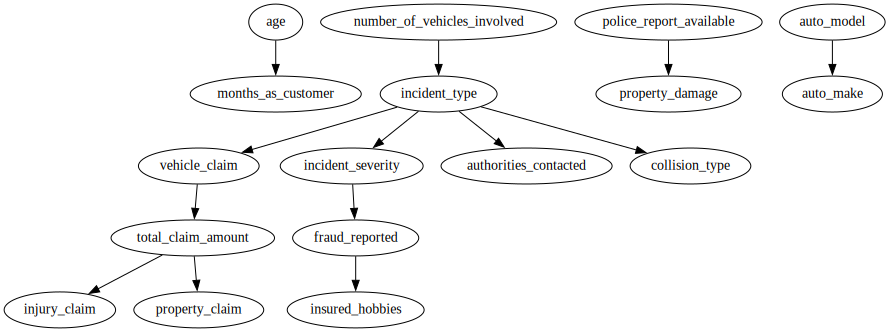

In [39]:
# Learn structure
est_hill = HillClimbSearch(df_cleaned)
best_hill_model = est_hill.estimate()
network_hc = DiscreteBayesianNetwork(best_hill_model)
mle_hc = MaximumLikelihoodEstimator(network_hc, df_cleaned)

dot = pgm.visualize_model(network_hc)
display(dot)
dot.render("Bayes Net", format="pdf")

for cpd in mle_hc.get_parameters():
    network_hc.add_cpds(cpd)

# dot = pgm.visualize_model(network_hc)
# display(dot)
# dot.render("Conditional Probability Tables", format="pdf")

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'number_of_vehicles_involved': 'C', 'incident_type': 'C', 'vehicle_claim': 'O', 'incident_severity': 'C', 'authorities_contacted': 'C', 'collision_type': 'C', 'total_claim_amount': 'O', 'fraud_reported': 'C', 'injury_claim': 'O', 'property_claim': 'O', 'insured_hobbies': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'number_of_vehicles_involved': 'C', 'incident_type': 'C', 'vehicle_claim': 'O', 'incident_severity': 'C', 'authorities_contacted': 'C', 'collision_type': 'C', 'total_claim_amount': 'O', 'fraud_reported': 'C', 'injury_claim': 'O', 'property_claim': 'O', 'insured_hobbies': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'number_of_vehicles_involved': 'C', 'incident_type': 'C', 'vehicle_claim': 'O', 'incident_severity': 'C', 'authorities_contacted

  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'number_of_vehicles_involved': 'C', 'incident_type': 'C', 'vehicle_claim': 'O', 'incident_severity': 'C', 'authorities_contacted': 'C', 'collision_type': 'C', 'total_claim_amount': 'O', 'fraud_reported': 'C', 'injury_claim': 'O', 'property_claim': 'O', 'insured_hobbies': 'C'}


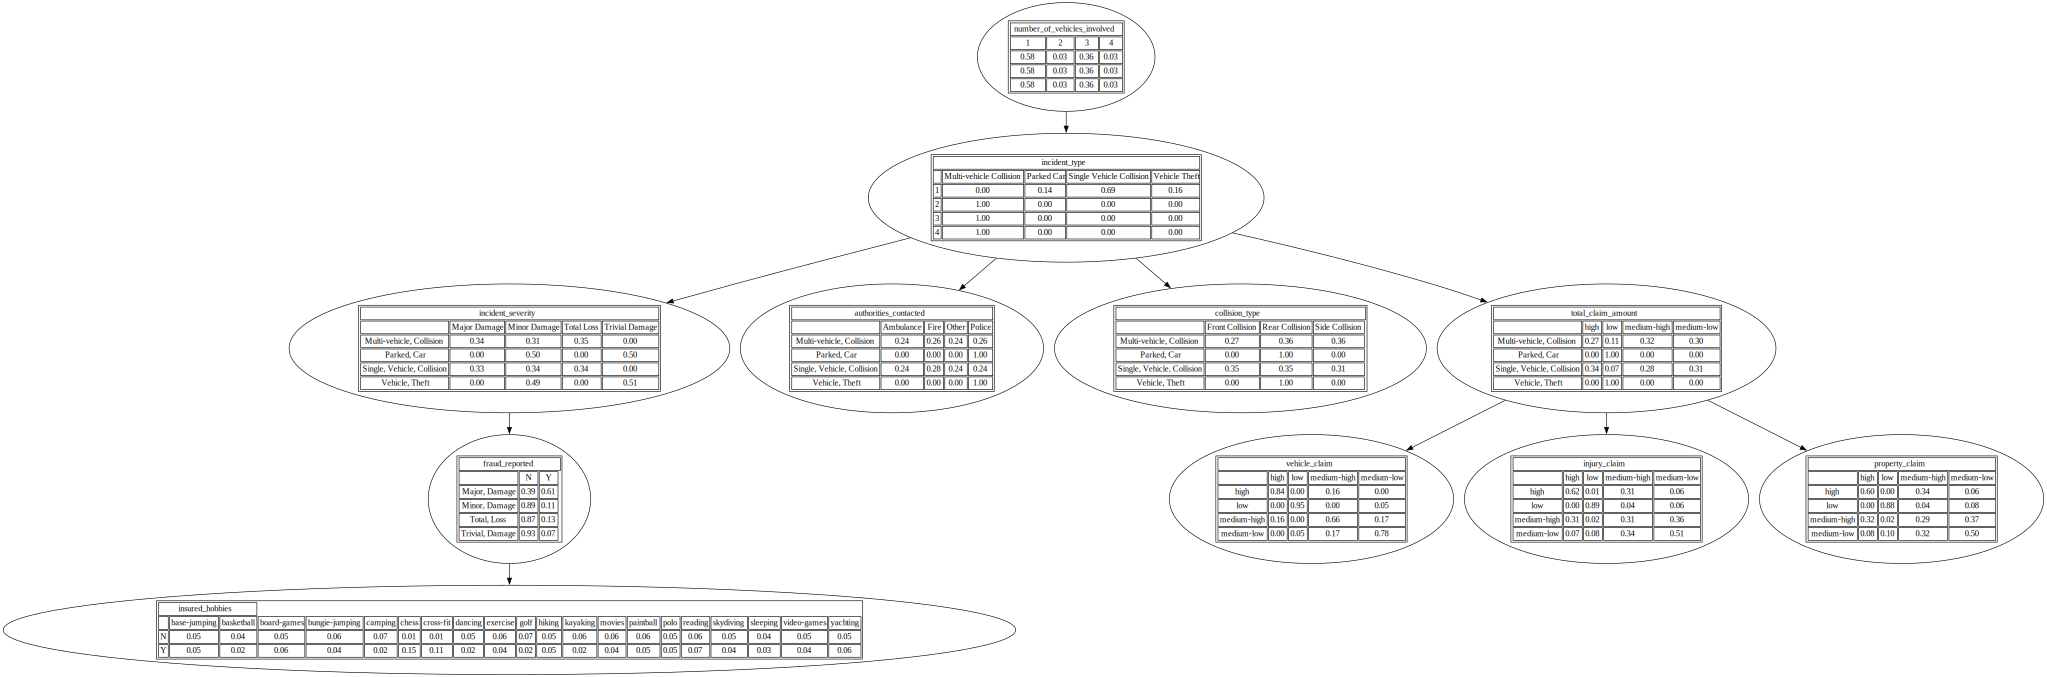

'Conditional Probability Tables.pdf'

In [45]:
# Learn structure
df_filtered = df_cleaned[['number_of_vehicles_involved', 'incident_type', 'vehicle_claim', 'incident_severity',
                          'authorities_contacted', 'collision_type', 'total_claim_amount', 'fraud_reported',
                          'injury_claim', 'property_claim', 'insured_hobbies']]
est_hill = HillClimbSearch(df_filtered)
best_hill_model = est_hill.estimate()
network_hc = DiscreteBayesianNetwork(best_hill_model)
mle_hc = MaximumLikelihoodEstimator(network_hc, df_filtered)

# dot = pgm.visualize_model(network_hc)
# display(dot)
# dot.render("Bayes Net", format="pdf")

for cpd in mle_hc.get_parameters():
    network_hc.add_cpds(cpd)

dot = pgm.visualize_model(network_hc)
display(dot)
dot.render("Conditional Probability Tables", format="pdf")

 🔗 \[1] `number_of_vehicles_involved`

**No parents – prior distribution**

| # Vehicles | Probability |
| ---------- | ----------- |
| 1          | 58%         |
| 2          | 36%         |
| 3, 4       | Rare (3%)   |

**Insight**:

> Most incidents are single or two-car accidents. Multi-car incidents (3+) are uncommon and potentially complex.

---

 🔗 \[2] `incident_type | number_of_vehicles_involved`

| Vehicles | Multi-vehicle                     | Parked Car | Single Vehicle | Theft |
| -------- | --------------------------------- | ---------- | -------------- | ----- |
| 1        | 0.00                              | 14%        | 86%            | 0%    |
| 2–4      | Mostly 100% Multi-vehicle (or 0%) |            |                |       |

**Insight**:

> Incident type is **highly deterministic** based on number of vehicles.
>
> * Parked Car cases happen only with single vehicle.
> * 2+ vehicles → almost certainly multi-vehicle collision.

**Use**:

> You can **impute missing `incident_type`** with near-perfect confidence if you know `number_of_vehicles_involved`.

---

 🔗 \[3] `incident_severity | incident_type`

| Type                    | Incident Severity (Major, Minor, Trivial, Total Loss)  |
| ----------------------- | --------------------------------------- |
| Multi-vehicle Collision | \~33% each for Major, Minor, Total Loss |  
| Single Vehicle          | Similar to above                        |     
| Vehicle Theft           | 51% Trivial, 49% Minor                  |       
| Parked Car              | 50% Minor, 50% Trivial                  |      

**Insight**:

> **Vehicle theft and parked car incidents are rarely severe**, while vehicle collisions result in a wide severity spread.

**Use**:

> This can help **triage claims**: certain types can be auto-labeled as low-risk due to low severity probabilities.

---

 🔗 \[4] `authorities_contacted | incident_type`

| Type                       | Authorities Contacted (Ambulance, Fire, Police, Other)|
| -------------------------- | --------------------- |
| Multi-vehicle Collision    | Evenly distributed    |    
| Vehicle Theft / Parked Car | Always → Police only  |     
| Single Vehicle             | Balanced across all 4 |   

**Insight**:

> Theft and parked cars **always report to police**, never to ambulance/fire.
> Multi-vehicle is more complex → diverse authority response.

**Use**:

> If `authorities_contacted` ≠ expected type (e.g., no police for theft), it could be a data inconsistency or red flag.

---

 🔗 \[5] `collision_type | incident_type`

| Type                 | Collision Type (Front, Rear, Side) |
| -------------------- | --------------- |
| Parked Car           | 100% Rear       | 
| Theft                | 100% Rear       |   
| Multi/Single-vehicle | Fairly balanced |   

**Insight**:

> Rear-end collisions dominate in **non-moving incidents** (parked or stolen).
> Front & side occur only in moving accidents.

---

 🔗 \[6] `total_claim_amount | incident_type`

| Type           | Claim Level (Low, Med-Low, Med-High, High)  |
| -------------- | --------- | 
| Theft          | 100% High |   
| Parked Car     | 100% Low  |   
| Single Vehicle | Balanced  |     
| Multi-Vehicle  | Balanced  |     

**Insight**:

> **Theft = expensive**, **Parked = cheap**, others = diverse.

**Use**:

> Smart rule-based thresholds could flag claims for review:
>
> * High-cost theft? Accept.
> * High-cost parked car? Red flag.

---

 🔗 \[7] `vehicle_claim | total_claim_amount`

| Claim Level      | Vehicle Claim Level (Low, Med-Low, Med-High, High) |
| ---------------- | --------------------------------- | 
| High total claim | 95% vehicle claim is also high    |     
| Med-high total   | Most go to Med-High vehicle claim |    
| Low total claim  | 100% vehicle claim is also low    |     

**Insight**:

> **Strong correlation** between total and vehicle claim → helps cross-validate consistency.

---

 🔗 \[8] `injury_claim | total_claim_amount`

| Total Claim → Injury Claim                 |
| ------------------------------------------ |
| High total → 31% injury high, rest med/low |
| Med-high → injury claim mostly medium      |
| Low → injury claim always low              |

**Insight**:

> Injuries generally scale with claim amount, but not as strictly as vehicle claims do.

**Use**:

> Slight deviations are okay — this is useful for modeling **partial dependence**.

---

 🔗 \[9] `property_claim | total_claim_amount`

| Total → Property                    |
| ----------------------------------- |
| High → mostly high                  |
| Med-high → property claim scattered |
| Low → 100% low property claim       |

**Insight**:

> Consistent with expectations; property claim scales with total but has **more spread** than vehicle.

---

 🔗 \[10] `insured_hobbies | fraud_reported`

Already covered earlier, but key insight:

> Riskier or uncommon hobbies (e.g., polo, skydiving, treading) might have slightly higher fraud ratios.

---

 💡 Overall Network-Wide Patterns & Ideas:

| Pattern                     | Insight                                                                                                             |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| 🎯 **Causal Chain**         | `#vehicles` → `incident_type` → `severity` → `claim amount(s)`                                                      |
| 🧩 **Validation**           | CPDs validate claim logic: total claim predicts components (vehicle/injury/property) well                           |
| 📋 **Auto-labeling**        | You can auto-fill `incident_type`, `collision_type`, `authorities_contacted` from a small set of upstream variables |
| 🚨 **Fraud behavior proxy** | Certain inconsistencies (e.g., high cost + parked car, or theft with no police) could be operational flags          |


## (2) Gamma-Poisson

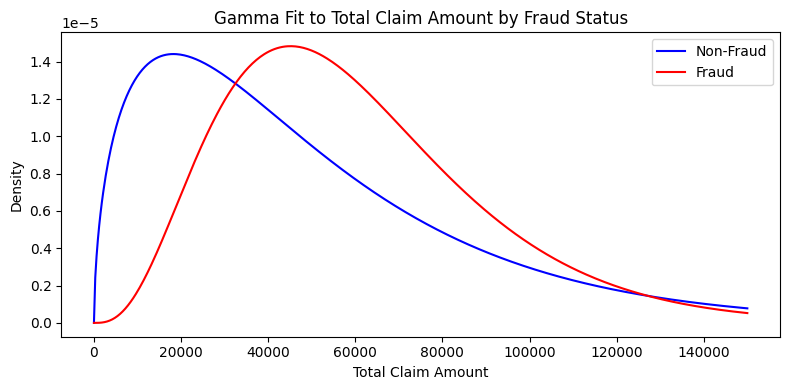

In [ ]:
from scipy.stats import dirichlet, gamma

df = insurance_claim.copy()

# -----------------------------
# Gamma-Poisson for claim amount (fraud vs non-fraud)
# -----------------------------

# Use total_claim_amount grouped by fraud
amounts_fraud = df[df["fraud_reported"] == "Y"]["total_claim_amount"].astype(float)
amounts_nonfraud = df[df["fraud_reported"] == "N"]["total_claim_amount"].astype(float)

# Estimate Gamma prior for Poisson mean
shape_fraud, loc_fraud, scale_fraud = gamma.fit(amounts_fraud, floc=0)
shape_nonfraud, loc_nonfraud, scale_nonfraud = gamma.fit(amounts_nonfraud, floc=0)

# Plot Gamma distributions
x_vals = np.linspace(0, 150000, 500)
pdf_fraud = gamma.pdf(x_vals, a=shape_fraud, loc=loc_fraud, scale=scale_fraud)
pdf_nonfraud = gamma.pdf(x_vals, a=shape_nonfraud, loc=loc_nonfraud, scale=scale_nonfraud)

plt.figure(figsize=(8, 4))
plt.plot(x_vals, pdf_nonfraud, label="Non-Fraud", color="blue")
plt.plot(x_vals, pdf_fraud, label="Fraud", color="red")
plt.title("Gamma Fit to Total Claim Amount by Fraud Status")
plt.xlabel("Total Claim Amount")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

| Observation                | Meaning                                                                                                                                                                                              |
| -------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 📍 **Peak shift**          | The peak of the **fraudulent claim distribution (red)** is shifted to the right compared to **non-fraud (blue)**. This suggests that fraudulent claims tend to involve **larger amounts**.           |
| 🏔 **Shape and Spread**    | The **non-fraud distribution** is more concentrated around lower claim amounts (approx. 15,000–35,000). In contrast, the **fraudulent distribution** spreads wider and centers around 35,000–55,000. |
| 🧨 **Heavy Tail in Fraud** | The **fraud curve (red)** has a longer right tail, indicating a **higher chance of extremely large claims** among fraudulent cases.                                                                  |



## (3) Dirichlet-Multinomial

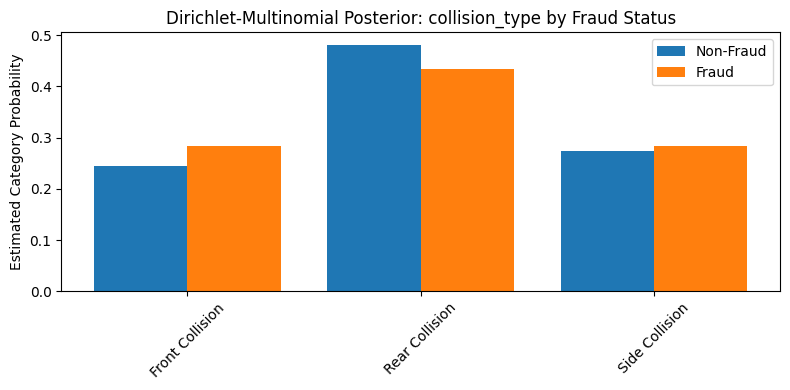

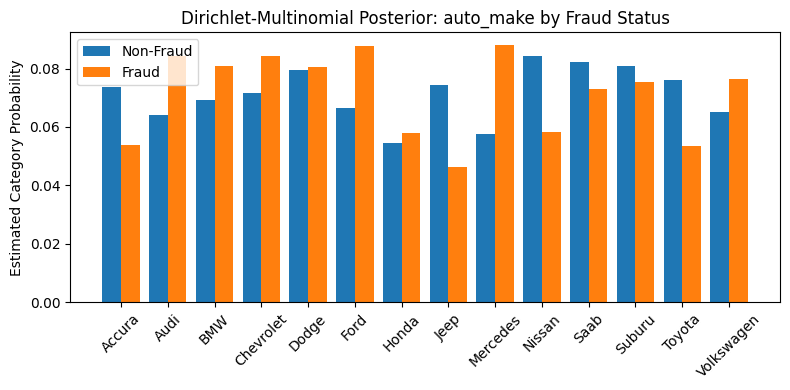

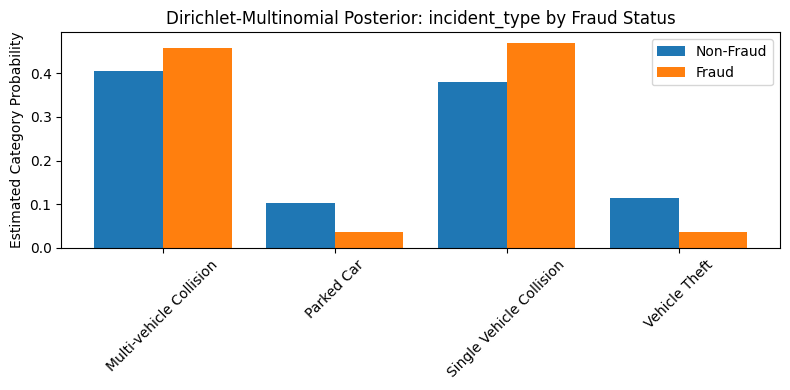

In [48]:
# Define a helper function to plot Dirichlet-Multinomial posterior for a given categorical feature
def plot_dirichlet_by_fraud(feature_name):
    # Compute counts
    counts = pd.crosstab(df[feature_name], df["fraud_reported"])
    alpha_fraud = counts["Y"] + 1
    alpha_nonfraud = counts["N"] + 1

    # Sample from Dirichlet posteriors
    samples_fraud = dirichlet(alpha_fraud).rvs(1000)
    samples_nonfraud = dirichlet(alpha_nonfraud).rvs(1000)

    # Compute mean estimates
    mean_fraud = samples_fraud.mean(axis=0)
    mean_nonfraud = samples_nonfraud.mean(axis=0)

    # Plot
    plt.figure(figsize=(8, 4))
    x = np.arange(len(alpha_fraud))
    plt.bar(x - 0.2, mean_nonfraud, width=0.4, label="Non-Fraud")
    plt.bar(x + 0.2, mean_fraud, width=0.4, label="Fraud")
    plt.xticks(ticks=x, labels=counts.index, rotation=45)
    plt.ylabel("Estimated Category Probability")
    plt.title(f"Dirichlet-Multinomial Posterior: {feature_name} by Fraud Status")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for 'collision_type' and 'auto_make'
plot_dirichlet_by_fraud("collision_type")
plot_dirichlet_by_fraud("auto_make")
plot_dirichlet_by_fraud("incident_type")


📊 Plot 1: **`collision_type` by Fraud Status**

🔍 Interpretation:

* **Rear Collision** is the most common overall, slightly more common in **non-fraud cases**.
* **Front Collision** has a **higher share in fraud cases**, which may suggest more frequent self-caused or staged accidents.
* **Side Collision** shows almost no difference between fraud and non-fraud groups.

✅ Insight:

> Front collisions may carry slightly higher fraud risk than other types, and rear collisions might be more legitimate on average.

---

📊 Plot 2: **`auto_make` by Fraud Status**

🔍 Interpretation:

* Some car brands like **BMW, Dodge, Mercedes, Volkswagen** have a **higher estimated probability in fraud cases**.
* Conversely, **Accura, Jeep, Toyota** appear more in non-fraud cases.
* Differences are small but visible, especially for **premium brands** (e.g., BMW, Mercedes).

✅ Insight:

> Fraud cases may be slightly more concentrated among **higher-end car brands**, possibly due to the higher repair costs or higher insurance value.

---

📊 Plot 3: **`incident_type` by Fraud Status**

🔍 Interpretation:

* **Single Vehicle Collisions** and **Multi-vehicle Collisions** occur more frequently in **fraud cases**.
* **Parked Car** and **Vehicle Theft** are more common in **non-fraud cases**.
* The difference is especially large for **Single Vehicle Collisions**, often easier to fake or exaggerate without external witnesses.

✅ Insight:

> Incident types involving **direct driving control** (e.g., single-vehicle) may carry higher fraud risk. “Passive” types (e.g., parked car theft) may be more legitimate.

---

💡 Overall Summary:

| Feature          | Fraud Bias Appears In            | Possible Explanation                               |
| ---------------- | -------------------------------- | -------------------------------------------------- |
| `collision_type` | Front Collision                  | Higher potential for staged crashes                |
| `auto_make`      | BMW, Dodge, Mercedes, Volkswagen | High-end vehicles may incentivize fraud            |
| `incident_type`  | Single Vehicle, Multi-vehicle    | More controllable by the claimant; less verifiable |


# 4. Fraud Prediction
## (1) Naive Bayes Classification for Fraud Detection

In [ ]:
# Prepare categorical features and target
categorical_features = [
    'insured_sex', 'insured_education_level', 'insured_occupation',
    'insured_hobbies', 'insured_relationship', 'incident_type',
    'collision_type', 'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city', 'property_damage',
    'police_report_available', 'auto_make', 'auto_model'
]

# Drop rows with missing or '?' values
df_nb = insurance_claim[categorical_features + ['fraud_reported']].replace('?', pd.NA).dropna()

# Encode categorical features
from sklearn.preprocessing import LabelEncoder

df_encoded = df_nb.copy()
for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [ ]:
# Encode target
if df_encoded['fraud_reported'].dtype == 'object':
    df_encoded['fraud_reported'] = df_encoded['fraud_reported'].map({'Y': 1, 'N': 0})

# Split the data
from sklearn.model_selection import train_test_split
X = df_encoded[categorical_features]
y = df_encoded['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
from sklearn.naive_bayes import CategoricalNB
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

CategoricalNB()

In [ ]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
y_probs = nb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       129
           1       0.65      0.62      0.63        53

    accuracy                           0.79       182
   macro avg       0.75      0.74      0.74       182
weighted avg       0.79      0.79      0.79       182



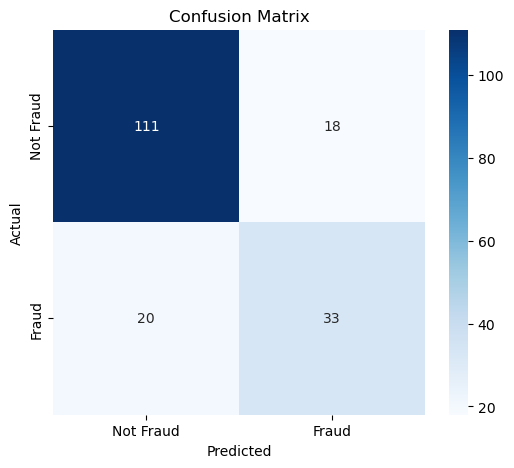

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

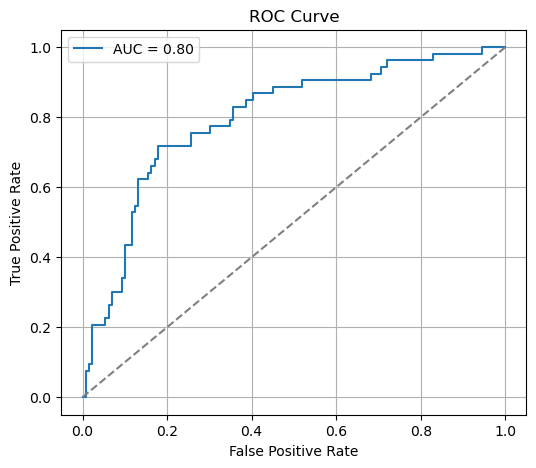

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

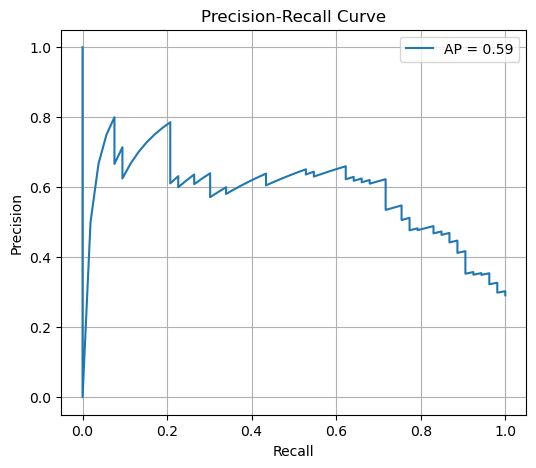

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_probs)
ap_score = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AP = {ap_score:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Check class balance: fraud vs non-fraud
print("Class distribution (0 = Not Fraud, 1 = Fraud):")
print(y.value_counts(normalize=True))

Class distribution (0 = Not Fraud, 1 = Fraud):
fraud_reported
0    0.734581
1    0.265419
Name: proportion, dtype: float64


In [ ]:
# Evaluate model performance using 5-fold cross-validation
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validated accuracy scores: [0.80769231 0.75274725 0.81318681 0.81767956 0.80110497]
Mean accuracy: 0.7984821808026228


In [ ]:
# Estimate the probability of fraud given each level of a selected feature
feature_name = 'incident_severity'
levels = df_encoded[feature_name].unique()

for level in levels:
    idx = df_encoded[feature_name] == level
    prob = df_encoded.loc[idx, 'fraud_reported'].mean()
    print(f"P(fraud | {feature_name} = {level}) = {prob:.2f}")


P(fraud | incident_severity = 0) = 0.61
P(fraud | incident_severity = 1) = 0.11
P(fraud | incident_severity = 2) = 0.13
P(fraud | incident_severity = 3) = 0.08


In [ ]:
# Analyze misclassified examples: false positives and false negatives
X_test_eval = X_test.copy()
X_test_eval['true'] = y_test.values
X_test_eval['pred'] = y_pred

false_negatives = X_test_eval[(X_test_eval['true'] == 1) & (X_test_eval['pred'] == 0)]
false_positives = X_test_eval[(X_test_eval['true'] == 0) & (X_test_eval['pred'] == 1)]

print(f"False Negatives (missed frauds): {len(false_negatives)}")
print(f"False Positives (mistaken frauds): {len(false_positives)}")

False Negatives (missed frauds): 20
False Positives (mistaken frauds): 18


## (2) Bayesian Network

In [ ]:
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'months_as_customer': 'O', 'age': 'O', 'policy_state': 'C', 'policy_csl': 'C', 'policy_deductable': 'C', 'policy_annual_premium': 'O', 'umbrella_limit': 'C', 'insured_sex': 'C', 'insured_education_level': 'C', 'insured_occupation': 'C', 'insured_hobbies': 'C', 'insured_relationship': 'C', 'capital-gains': 'C', 'capital-loss': 'C', 'incident_type': 'C', 'collision_type': 'C', 'incident_severity': 'C', 'authorities_contacted': 'C', 'incident_state': 'C', 'incident_city': 'C', 'number_of_vehicles_involved': 'C', 'property_damage': 'C', 'bodily_injuries': 'C', 'witnesses': 'C', 'police_report_available': 'C', 'total_claim_amount': 'O', 'injury_claim': 'O', 'property_claim': 'O', 'vehicle_claim': 'O', 'auto_make': 'C', 'auto_model': 'C', 'fraud_reported': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'months_as_customer': 

  0%|          | 0/1000000 [00:00<?, ?it/s]

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'months_as_customer': 'O', 'age': 'O', 'policy_state': 'C', 'policy_csl': 'C', 'policy_deductable': 'C', 'policy_annual_premium': 'O', 'umbrella_limit': 'C', 'insured_sex': 'C', 'insured_education_level': 'C', 'insured_occupation': 'C', 'insured_hobbies': 'C', 'insured_relationship': 'C', 'capital-gains': 'C', 'capital-loss': 'C', 'incident_type': 'C', 'collision_type': 'C', 'incident_severity': 'C', 'authorities_contacted': 'C', 'incident_state': 'C', 'incident_city': 'C', 'number_of_vehicles_involved': 'C', 'property_damage': 'C', 'bodily_injuries': 'C', 'witnesses': 'C', 'police_report_available': 'C', 'total_claim_amount': 'O', 'injury_claim': 'O', 'property_claim': 'O', 'vehicle_claim': 'O', 'auto_make': 'C', 'auto_model': 'C', 'fraud_reported': 'C'}


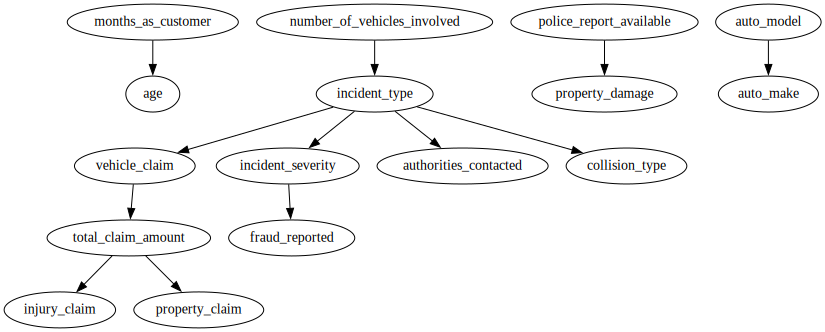

In [37]:
# Learn structure
est_hill = HillClimbSearch(train_df)
best_hill_model = est_hill.estimate()
network_hc = DiscreteBayesianNetwork(best_hill_model)
mle_hc = MaximumLikelihoodEstimator(network_hc, train_df)

dot = pgm.visualize_model(network_hc)
display(dot)
dot.render("Bayes Net", format="pdf")

for cpd in mle_hc.get_parameters():
    network_hc.add_cpds(cpd)

# dot = pgm.visualize_model(network_hc)
# display(dot)
# dot.render("Conditional Probability Tables", format="pdf")

In [32]:
from sklearn.metrics import accuracy_score, f1_score

# Inference and prediction
infer = VariableElimination(network_hc)
true_labels = []
predicted_labels = []
evidence_vars = set(network_hc.nodes()) - {'fraud_reported'}

for _, row in test_df.iterrows():
    try:
        evidence = {var: row[var] for var in evidence_vars if pd.notnull(row[var])}
        prediction = infer.map_query(variables=['fraud_reported'], evidence=evidence, show_progress=False)
        true_labels.append(row['fraud_reported'])
        predicted_labels.append(prediction['fraud_reported'])
    except Exception:
        continue

# Evaluation
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8000
F1 Score: 0.7401


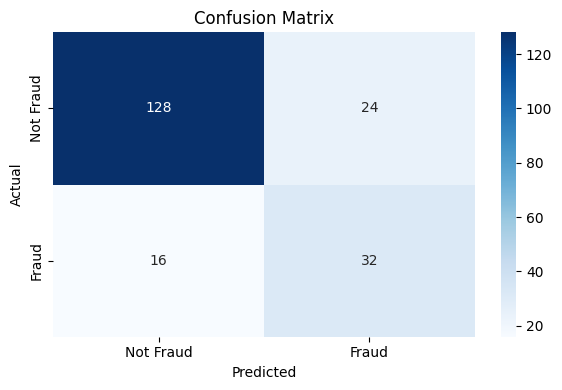

In [33]:
# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

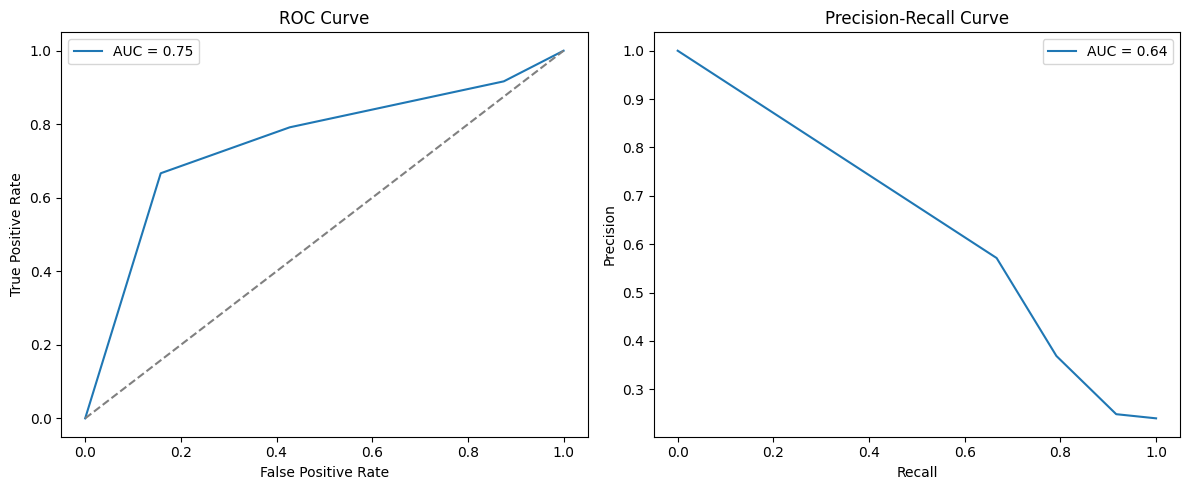

In [ ]:
true_labels = []
predicted_probs = []

for _, row in test_df.iterrows():
    try:
        evidence = {var: row[var] for var in evidence_vars if pd.notnull(row[var])}
        query_result = infer.query(variables=['fraud_reported'], evidence=evidence, show_progress=False)
        prob_fraud = query_result.values[1]  # P(fraud_reported=1)
        predicted_probs.append(prob_fraud)
        true_labels.append(1 if row['fraud_reported'] == 'Y' else 0)  # ✔️ 字符标签转数字
    except Exception:
        continue


# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_labels, predicted_probs)
pr_auc = auc(recall, precision)

# Plot both curves
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PR Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


## (3) XGBoost

In [27]:
# Re-run necessary steps to preprocess and recreate the dataset before model training
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_drop = ['policy_number', 'incident_date', 'auto_year', 'count']
df_full = insurance_claim.drop(columns=[col for col in columns_to_drop if col in insurance_claim.columns])

# Convert target to categorical
df_full["fraud_reported"] = df_full["fraud_reported"].astype("category")

# Convert all object/category columns to string
for col in df_full.select_dtypes(include=["object", "category"]).columns:
    df_full[col] = le.fit_transform(df_full[col])

df_full

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,1,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,0,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,0,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,0,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,1,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,1,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,0,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,0,46980,5220,5220,36540,1,5,0


In [28]:
train_df, test_df = train_test_split(df_full, test_size=0.2, random_state=42)

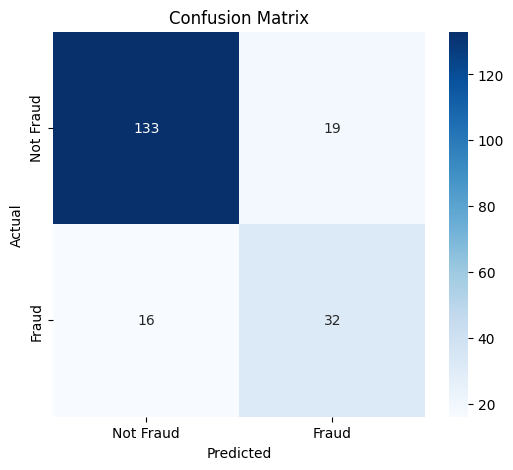

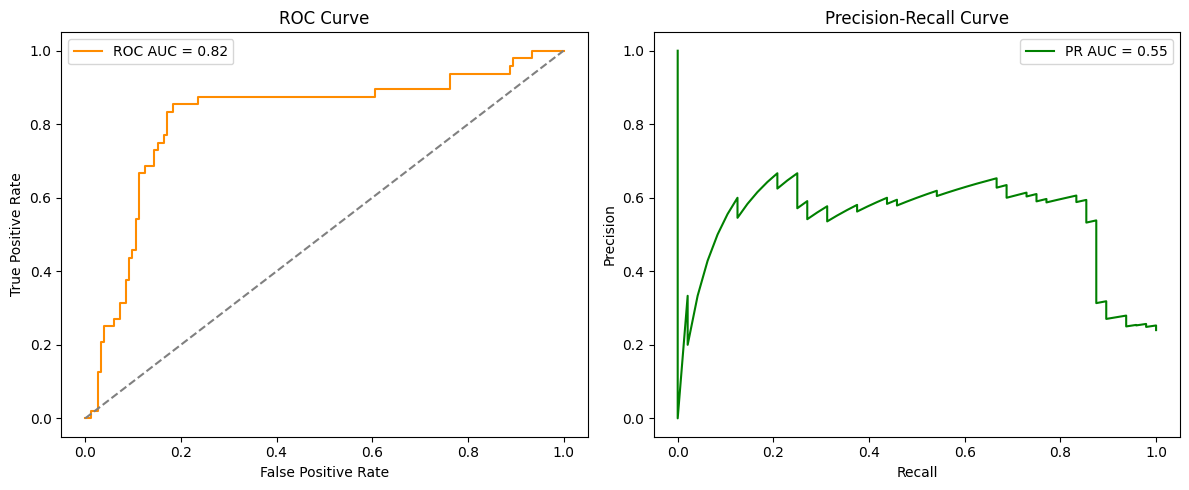

In [ ]:
from xgboost import XGBClassifier

# Separate X and y
X_train = train_df.drop(columns=["fraud_reported"])
y_train = train_df["fraud_reported"].astype(int)

X_test = test_df.drop(columns=["fraud_reported"])
y_test = test_df["fraud_reported"].astype(int)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

# Plot
plt.figure(figsize=(12, 5))

# ROC
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PR
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()

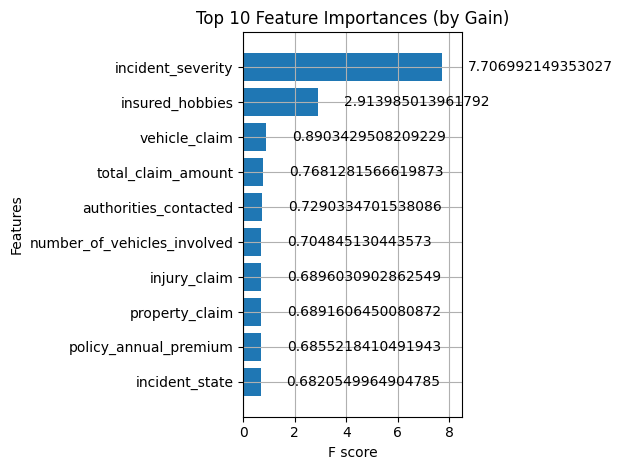

In [40]:
from xgboost import plot_importance

plot_importance(
    model,
    importance_type='gain',
    max_num_features=10,
    height=0.8
)
plt.title("Top 10 Feature Importances (by Gain)")
plt.tight_layout()
plt.show()